# Dependencies and imports

In [8]:
# Dependencies
%pip install numpy
%pip install pyvista
%pip install "pyvista[jupyter]" 
%pip install trame ipywidgets
%pip install matplotlib
%pip install torch torchvision torchaudio
%pip install nnunetv2
%pip install simpleitk
%pip install os
%pip install json
%pip install nibabel
%pip install monai


!python -c "import monai" || pip install -U "monai-weekly[fire, nibabel, yaml, tqdm, einops]"
%env CUDA_VISIBLE_DEVICES=0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadat

In [9]:
import numpy as np
import SimpleITK as sitk
import pyvista as pv
import matplotlib.pyplot as plt
import os
import json

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from monai.apps.auto3dseg import AutoRunner
from monai.config import print_config
from monai.data import create_test_image_3d

print_config()

MONAI version: 1.4.0
Numpy version: 1.26.4
Pytorch version: 2.3.1+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 46a5272196a6c2590ca2589029eed8e4d56ff008
MONAI __file__: /home/<username>/.local/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.15.2
Pillow version: 11.1.0
Tensorboard version: 2.14.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.18.1+cu118
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 7.0.0
pandas version: 2.2.3
einops version: 0.8.1
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the

# Loading in the data

In [ ]:
volume = pv.read(f"nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_001_0000.nrrd")
centerline = pv.read(f"nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_001.nrrd")
annotations = pv.read(f"nnUNet_raw/Dataset100_normal/ReorientedCenterlines/Normal_1.vtp")
mesh = pv.read(f"nnUNet_raw/Dataset100_normal/ReorientedMeshes/Normal_1.stl")



/home/jovyan


In [26]:


sim_datalist = {
    "testing": [
        {"image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_001_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_001.nrrd"},
        {"image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_002_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_002.nrrd"},
    ],
    "training": [
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_003_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_003.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_004_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_004.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_005_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_005.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_006_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_006.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_007_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_007.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_008_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_008.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_009_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_009.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_010_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_010.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_011_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_011.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_012_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_012.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_013_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_013.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_014_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_014.nrrd"},
    ],
}

sim_dim = (64, 64, 64)


# Generate images and labels

# Generate images and labels

In [30]:
work_dir = "./auto3dseg_dir"
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

dataroot_dir = os.path.join(work_dir, "sim_dataroot")
if not os.path.isdir(dataroot_dir):
    os.makedirs(dataroot_dir)

datalist_file = os.path.join(work_dir, "sim_datalist.json")
with open(datalist_file, "w") as f:
    json.dump(sim_datalist, f)
for d in sim_datalist["testing"] + sim_datalist["training"]:
    im, seg = create_test_image_3d(
        sim_dim[0], sim_dim[1], sim_dim[2], rad_max=10, num_seg_classes=1, random_state=np.random.RandomState(42)
    )
    
    image_fpath = os.path.join(dataroot_dir, d["image"])
    label_fpath = os.path.join(dataroot_dir, d["label"])
    
    # Create intermediate directories if they don't exist
    os.makedirs(os.path.dirname(image_fpath), exist_ok=True)
    os.makedirs(os.path.dirname(label_fpath), exist_ok=True)
    
    # Save using SimpleITK
    im_sitk = sitk.GetImageFromArray(im)
    sitk.WriteImage(im_sitk, image_fpath)

    seg_sitk = sitk.GetImageFromArray(seg)
    sitk.WriteImage(seg_sitk, label_fpath)
    
# for d in sim_datalist["testing"] + sim_datalist["training"]:
#     im, seg = create_test_image_3d(
#         sim_dim[0], sim_dim[1], sim_dim[2], rad_max=10, num_seg_classes=1, random_state=np.random.RandomState(42)
#     )
#     image_fpath = os.path.join(dataroot_dir, d["image"])
#     label_fpath = os.path.join(dataroot_dir, d["label"])
    

#     im_sitk = sitk.GetImageFromArray(im)
#     sitk.WriteImage(im_sitk, image_fpath)

#     # Label opslaan
#     seg_sitk = sitk.GetImageFromArray(seg)
#     sitk.WriteImage(seg_sitk, label_fpath)
    
#     #nib.save(nib.Nifti1Image(im, affine=np.eye(4)), image_fpath)
#     #nib.save(nib.Nifti1Image(seg, affine=np.eye(4)), label_fpath)

## Meshes

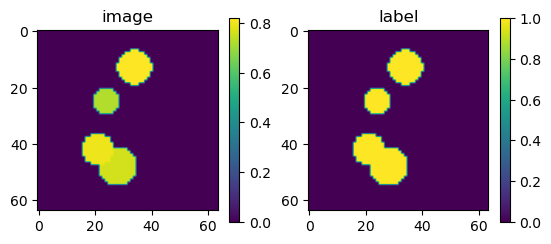

In [45]:

# Load the image using SimpleITK
image_path = os.path.join(dataroot_dir, sim_datalist["testing"][0]["image"])
label_path = os.path.join(dataroot_dir, sim_datalist["testing"][0]["label"])

# Read images and labels using SimpleITK
img_sitk = sitk.ReadImage(image_path)
lbl_sitk = sitk.ReadImage(label_path)

# Convert SimpleITK images to numpy arrays
img = sitk.GetArrayFromImage(img_sitk)
lbl = sitk.GetArrayFromImage(lbl_sitk)

# img_nib = nib.load(os.path.join(dataroot_dir, sim_datalist["testing"][0]["image"]))
# lbl_nib = nib.load(os.path.join(dataroot_dir, sim_datalist["testing"][0]["label"]))
# img = np.array(img_nib.dataobj)
# lbl = np.array(lbl_nib.dataobj)
plt.subplot(1, 2, 1)
plt.imshow(img[32])
plt.title("image")
cbar = plt.colorbar(shrink=0.55)
plt.subplot(1, 2, 2)
plt.imshow(lbl[32])
plt.title("label")
cbar = plt.colorbar(shrink=0.55)

In [39]:

runner = AutoRunner(
    work_dir=work_dir,
    input={
        "modality": "CT",
        "datalist": datalist_file,
        "dataroot": dataroot_dir,
    },
)

2025-03-13 12:49:29,697 - INFO - AutoRunner using work directory /home/jovyan/auto3dseg_dir
2025-03-13 12:49:29,715 - INFO - Found num_fold 3 based on the input datalist /home/jovyan/auto3dseg_dir/sim_datalist.json.
2025-03-13 12:49:29,716 - INFO - Setting num_fold 3 based on the input datalist /home/jovyan/auto3dseg_dir/sim_datalist.json.
2025-03-13 12:49:29,720 - INFO - Using user defined command running prefix , will override other settings


In [42]:

max_epochs = 2

train_param = {
    "num_epochs_per_validation": 1,
    "num_images_per_batch": 2,
    "num_epochs": max_epochs,
    "num_warmup_epochs": 1,
}
runner.set_training_params(train_param)
runner.set_num_fold(num_fold=1)

In [44]:

runner.run()

2025-03-13 12:49:59,679 - INFO - Running data analysis...
2025-03-13 12:49:59,683 - INFO - Found 1 GPUs for data analyzing!


  0%|          | 0/12 [00:00<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/io/dictionary.py", line 163, in __call__
    data = self._loader(d[key], reader)
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/io/array.py", line 264, in __call__
    img = reader.read(filename)
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/data/image_reader.py", line 491, in read
    ds = pydicom.dcmread(fp=name, **kwargs_)
  File "/home/jovyan/.local/lib/python3.10/site-packages/pydicom/filereader.py", line 1078, in dcmread
    dataset = read_partial(
  File "/home/jovyan/.local/lib/python3.10/site-packages/pydicom/filereader.py", line 839, in read_partial
    preamble = read_preamble(fileobj, force)
  File "/home/jovyan/.local/lib/python3.10/site-packages/pydicom/filereader.py", line 784, in read_preamble
    raise InvalidDicomError(
pydicom.errors.InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/data/dataset.py", line 108, in __getitem__
    return self._transform(index)
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/data/dataset.py", line 94, in _transform
    return self.transform(data_i)
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/compose.py", line 335, in __call__
    result = execute_compose(
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/compose.py", line 111, in execute_compose
    data = apply_transform(
  File "/home/jovyan/.local/lib/python3.10/site-packages/monai/transforms/transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.transforms.io.dictionary.LoadImaged object at 0x7f74917e3c70>


In [38]:

image_name = sim_datalist["testing"][0]["image"].split(".")[0]
prediction_nib = nib.load(os.path.join(work_dir, "ensemble_output", image_name + "_ensemble" + ".nii.gz"))
pred = np.array(prediction_nib.dataobj)

img_slice32 = lbl[32] == 0
label_slice32 = lbl[32] == 1
background_slice32 = pred[32, :, :, 0] if pred.ndim == 4 else pred[32] == 0
foreground_slice32 = pred[32, :, :, 1] if pred.ndim == 4 else pred[32] == 1

plt.subplot(2, 2, 1)
plt.imshow(img_slice32)
plt.title("background groundtruth")
cbar = plt.colorbar(shrink=0.8)
plt.subplot(2, 2, 2)
plt.imshow(label_slice32)
plt.title("foreground_groundtruth")
cbar = plt.colorbar(shrink=0.8)
plt.subplot(2, 2, 3)
plt.imshow(background_slice32)
plt.title("background prediction")
cbar = plt.colorbar(shrink=0.8)
plt.subplot(2, 2, 4)
plt.imshow(foreground_slice32)
plt.title("foreground prediction")
cbar = plt.colorbar(shrink=0.8)
# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

FileNotFoundError: No such file or no access: 'auto3dseg_dir/ensemble_output/nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_001_0000_ensemble.nii.gz'